# Geant4 Photonuclear Validation Studies

In [2]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from scipy import stats
from scipy import constants

import math

# Use the Bayesian Methods for Hackers style
plt.style.use('bmh')

# Set matplotlib params
plt.rc('text', usetex=True)
matplotlib.rcParams.update({'font.size' : 20})

In [2]:
# Load the records containing the Geant4 validation data
data = np.genfromtxt("/home/omoreno/work/ldmx/analysis/geant4_validation/hydrogen_ecal_test_nt_gamma_p_to_pi_p_e1000000000_pn3999218.csv", 
                    dtype=[('e_gamma', 'f8'),
                           ('gamma_p_dir_x', 'f8'), 
                           ('gamma_p_dir_y', 'f8'),
                           ('gamma_p_dir_z', 'f8'),
                           ('n_secondaries', 'f8'),
                           ('pi0_ke', 'f8'),
                           ('pi0_p_x', 'f8'),
                           ('pi0_p_y', 'f8'),
                           ('pi0_p_z', 'f8'),
                           ('pi0_p_dir_x', 'f8'),
                           ('pi0_p_dir_y', 'f8'),
                           ('pi0_p_dir_z', 'f8'),
                           ('p_ke', 'f8'),
                           ('p_p_x', 'f8'),
                           ('p_p_y', 'f8'),
                           ('p_p_z', 'f8'),
                           ('p_p_dir_x', 'f8'),
                           ('p_p_dir_y', 'f8'),
                           ('p_p_dir_z', 'f8'),
                          ],
                    delimiter=','
                    )

e_gamma       = data['e_gamma']
gamma_p_dir_x = data['gamma_p_dir_x']
gamma_p_dir_y = data['gamma_p_dir_y']
gamma_p_dir_z = data['gamma_p_dir_z']
n_secondaries = data['n_secondaries']
pi0_ke        = data['pi0_ke']
pi0_p_x       = data['pi0_p_x']
pi0_p_y       = data['pi0_p_y']
pi0_p_z       = data['pi0_p_z']
pi0_p_dir_x   = data['pi0_p_dir_x']
pi0_p_dir_y   = data['pi0_p_dir_y']
pi0_p_dir_z   = data['pi0_p_dir_z']
p_ke          = data['p_ke']
p_p_x         = data['p_p_x']
p_p_y         = data['p_p_y']
p_p_z         = data['p_p_z']
p_p_dir_x     = data['p_p_dir_x']
p_p_dir_y     = data['p_p_dir_y']
p_p_dir_z     = data['p_p_dir_z']

In [3]:
# Load photonuclear xsec measurements from data
gamma_energy_arm = [1390.00, 1415.00] # MeV
gamma_energy_bloom = [1404.00] # GeV
gamma_p_inc_xsec_arm = [0.15360, 0.14680] # mb
gamma_p_inc_xsec_bloom = [0.11600] # mb
gamma_p_inc_xsec_err_arm = [5.4e-03, 5.2e-03] # mb
gamma_p_inc_xsec_err_bloom = [1.7e-02] # mb

gamma_p_to_pi0_p_theta_cm_althoff = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 
                                     120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]
gamma_p_to_pi0_p_diff_xsec_althoff = [.67, .74, .72, .85, .99, .99, .92, .92, .84, 
                                               .72, .67, .68, .70, .79, .98, 1.20, 1.31, 1.53, 1.70,
                                               1.76, 1.86, 1.82, 1.87, 1.76]
gamma_p_to_pi0_p_diff_xsec_err_althoff = [0.03, 0.04, 0.02, 0.03, 0.03, 0.04, 0.03, 0.03, 0.02, 
                                                  0.02, 0.02, 0.02, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 
                                                  0.04, 0.04, 0.04, 0.04, 0.05, 0.05]

In [4]:
#################
#   Constants   #
#################

proton_mass = constants.physical_constants['proton mass energy equivalent in MeV'][0] # MeV/c^2
pi0_mass = 134.976 # MeV/c^2
avogadros = constants.physical_constants['Avogadro constant'][0] # 1/mole
lh_density = 0.07097 # g/cm^3
lh_atomic_mass = 1.00794 # g/mole
ubarn = 10e-30 # cm^2
mbarn = 10e-27 # cm^2

## Inclusive $\sigma_{\gamma p}$ @ 1.4 GeV 

Integrated luminosity: 377551.514465 mb^-1 
Total photonuclear reactions: 3999218
Total gammas on target: 1000000000
Inclusive photonuclear cross-section: 0.0105925094902 mb


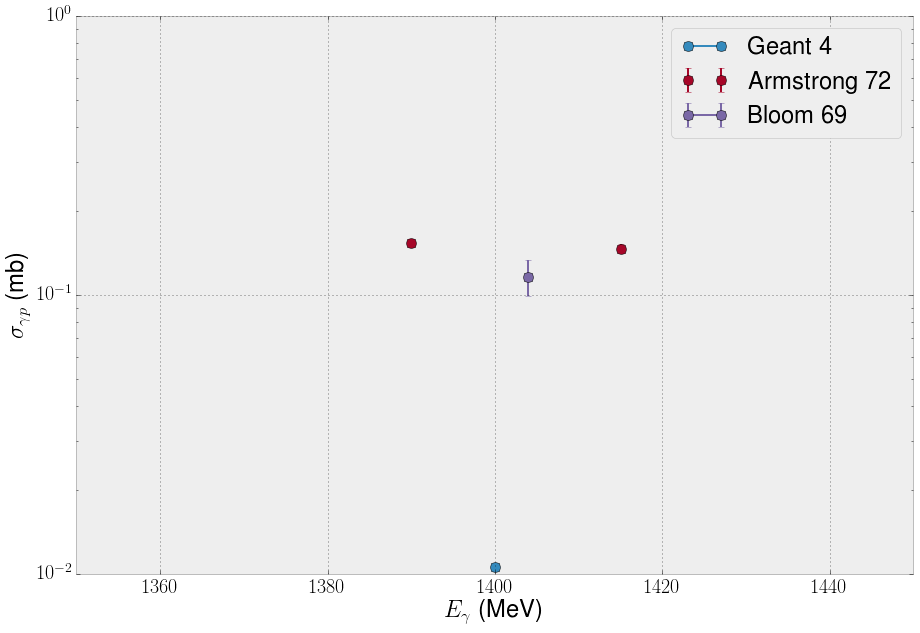

In [5]:
################################
#   Calculate the luminosity   #
################################

total_photonuclear_reactions = 3999218
total_gammas_on_target = 1000000000

# Length of the target.  In this case, it's the length of the first absorber layer
target_length = 890.4 # cm

# Integrated luminosity assuming a liquid hydrogen target
L_mb = total_gammas_on_target*(avogadros*lh_density/lh_atomic_mass)*target_length*mbarn
L_ub = total_gammas_on_target*(avogadros*lh_density/lh_atomic_mass)*target_length*ubarn
print "Integrated luminosity: " + str(L_ub) + " mb^-1 "

# Calculate the inclusive cross-section
inc_gamma_p_xsec = total_photonuclear_reactions/L_mb

#  Photo-nuclear cross-section
print "Total photonuclear reactions: " + str(total_photonuclear_reactions)
print "Total gammas on target: " + str(total_gammas_on_target)
print "Inclusive photonuclear cross-section: " + str(inc_gamma_p_xsec) + " mb"

# Energy of photons on hydrogen 'target'
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax0.plot(e_gamma[0], inc_gamma_p_xsec, marker='o', markersize=10, label='Geant 4')
ax0.errorbar(gamma_energy_arm, gamma_p_inc_xsec_arm, 
             yerr=gamma_p_inc_xsec_err_arm, marker='o', markersize=10, ls='none', label='Armstrong 72')
ax0.errorbar(gamma_energy_bloom, gamma_p_inc_xsec_bloom, 
             yerr=gamma_p_inc_xsec_err_bloom, marker='o', markersize=10, label='Bloom 69')

ax0.set_xlabel('$E_{\gamma}$ $\mbox{(MeV)}$')
ax0.set_xlim(1350, 1450)
ax0.set_ylabel('$\sigma_{\gamma p}$ (mb)')
ax0.set_yscale('log')
ax0.legend();

## $\gamma p \rightarrow \pi^{0} p$

In [6]:
# Calculate gamma p --> pi0 p xsec
total_gamma_p_to_pi0_p_events = len(pi0_p_dir_z)
print "Total number of gamma p --> pi0 p reactions: " + str(total_gamma_p_to_pi0_p_events)

# Calculate the inclusive cross-section
gamma_p_to_p_pi0_xsec = total_gamma_p_to_pi0_p_events/L_ub
print "gamma p --> pi0 p xsec: " + str(gamma_p_to_p_pi0_xsec) + " ub "

Total number of gamma p --> pi0 p reactions: 222163
gamma p --> pi0 p xsec: 0.588430959719 ub 


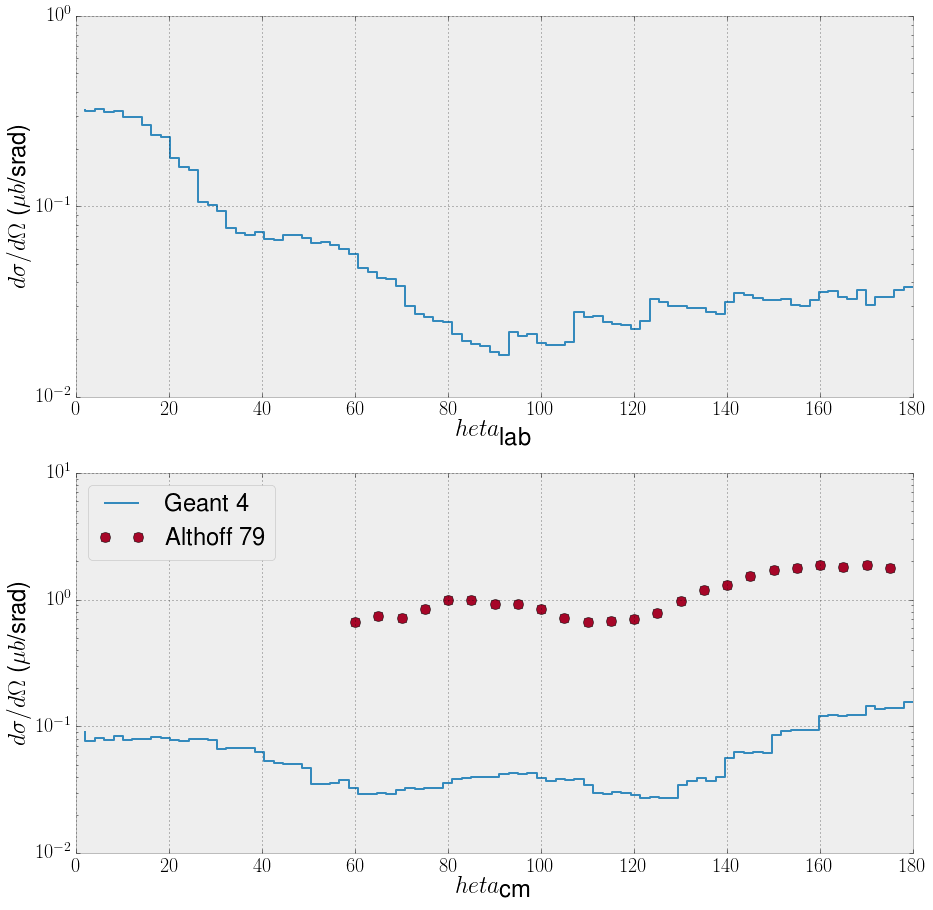

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

bins = np.linspace(0, 180, 90)
pi0_theta_lab = np.arccos(pi0_p_dir_z)*(180/math.pi)

hist, bin_edges = np.histogram(pi0_theta_lab, bins=bins)
#print bin_edges[:-1]
#print bin_edges[1:]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2. + 1
omega_factor = 2*math.pi*(-np.cos(bin_edges[1:]*(math.pi/180)) - (-np.cos(bin_edges[:-1]*(math.pi/180))))
#print omega_factor

#omega_factor = 2*math.pi*np.sin(bin_centers*(math.pi/180))
hist = np.divide(hist, omega_factor)/L_ub
#hist = hist/L_ub
ax0.step(bin_centers, hist, label='Geant 4')
ax0.set_yscale('log')

#ax0.hist(pi0_theta_lab, bins=90, alpha=0.8, histtype='stepfilled')
ax0.set_xlabel("$\theta_{\mbox{lab}}$")
ax0.set_ylabel("$d\sigma/d \Omega$ ($\mu b$/srad)")

#print "%%%%%%   Kinematics   %%%%%"

e_pi0 = np.add(pi0_ke, pi0_mass)
#print "E_pi0: " + str(e_pi0[0])

# m_pi^2
a = math.pow(pi0_mass, 2)
#print "a: " + str(a)

# 2*E_1*E_3
b = -2*np.multiply(e_gamma, e_pi0)
#print "b: " + str(b[0])

# 2*p1p3 cos (theta13)
px2_pi0 = np.power(pi0_p_x, 2)
py2_pi0 = np.power(pi0_p_y, 2)
pz2_pi0 = np.power(pi0_p_z, 2)
p_pi0 = np.add(px2_pi0, py2_pi0)
p_pi0 = np.add(p_pi0, pz2_pi0)
p_pi0 = np.sqrt(p_pi0)
#print "p pi0: " + str(p_pi0[0])

c = np.multiply(2*np.multiply(e_gamma, p_pi0), pi0_p_dir_z)
#print "c: " + str(c[0])

t = np.add(a, b)
t = np.add(t, c)
#print "t: " + str(t[0])

s = math.pow(proton_mass, 2) + 2*proton_mass*e_gamma[0]
#print "s: " + str(s)

e_gamma_cm = (s - math.pow(proton_mass, 2))/(2*math.sqrt(s))
#print "E_gamma in CM: " + str(e_gamma_cm)

p_gamma_cm = (1/(2*math.sqrt(s)))*math.sqrt((s - math.pow(proton_mass, 2))*(s - math.pow(proton_mass, 2)))
#print "p_gamma in CM: " + str(p_gamma_cm)

e_pi0_cm = (s + math.pow(pi0_mass, 2) - math.pow(proton_mass, 2))/(2*math.sqrt(s))
#print "E_pi0 in CM: " + str(e_pi0_cm)

p_pi0_cm = (1/(2*math.sqrt(s)))*math.sqrt((s - math.pow(pi0_mass - proton_mass, 2))*(s - math.pow(pi0_mass + proton_mass, 2)))
#print "p_pi0 in CM: " + str(p_pi0_cm)

t0 = math.pow(e_gamma_cm - e_pi0_cm, 2) - math.pow(p_gamma_cm - p_pi0_cm, 2)
#print "t0 " + str(t0_theory)

cos_theta_cm = 1 - np.subtract(t0, t)/(2*p_gamma_cm*p_pi0_cm)
#print "cos theta: " + str(cos_theta_cm)

theta_cm = np.arccos(cos_theta_cm)
#print "theta CM: " + str(theta_cm)

hist, bin_edges = np.histogram(theta_cm*(180/math.pi), bins=bins)
#hist = hist/L_ub
hist = np.divide(hist, omega_factor)/L_ub
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2. + 1
ax1.step(bin_centers, hist, label='Geant 4')

#gamma_p_to_pi0_p_diff_xsec_err_althoff 

ax1.errorbar(gamma_p_to_pi0_p_theta_cm_althoff, 
             gamma_p_to_pi0_p_diff_xsec_althoff,
             marker='o', markersize=10, ls='none', label='Althoff 79'
            )

ax1.set_xlabel("$ \theta_{\mbox{cm}}$")
ax1.set_ylabel("$d\sigma/d \Omega$ ($\mu b$/srad)")
ax1.set_yscale('log')
ax1.legend(loc=2);

In [3]:
# Load the records containing the Geant4 validation data
data = np.genfromtxt("/home/omoreno/work/ldmx/analysis/geant4_validation/lead_calorimeter_studies_nt_gamma_pb_to_pi_x_e100000000_b59950187_pn52148.csv", 
                    dtype=[('e_gamma', 'f8'),
                           ('gamma_p_dir_x', 'f8'), 
                           ('gamma_p_dir_y', 'f8'),
                           ('gamma_p_dir_z', 'f8'),
                           ('n_secondaries', 'f8'),
                           ('secondary_ke', 'f8'),
                           ('secondary_p_x', 'f8'),
                           ('secondary_p_y', 'f8'),
                           ('secondary_p_z', 'f8'),
                           ('secondary_p_dir_x', 'f8'),
                           ('secondary_p_dir_y', 'f8'),
                           ('secondary_p_dir_z', 'f8')
                          ],
                    delimiter=','
                    )

e_gamma       = data['e_gamma']
gamma_p_dir_x = data['gamma_p_dir_x']
gamma_p_dir_y = data['gamma_p_dir_y']
gamma_p_dir_z = data['gamma_p_dir_z']
n_secondaries = data['n_secondaries']
secondary_ke        = data['secondary_ke']
secondary_p_x       = data['secondary_p_x']
secondary_p_y       = data['secondary_p_y']
secondary_p_z       = data['secondary_p_z']
secondary_p_dir_x   = data['secondary_p_dir_x']
secondary_p_dir_y   = data['secondary_p_dir_y']
secondary_p_dir_z   = data['secondary_p_dir_z']

In [4]:
################################
#   Calculate the luminosity   #
################################

total_photonuclear_reactions = 52148
total_gammas_on_target = 59950187

# Length of the target.  In this case, it's the length of the first absorber layer
target_length = .05612 # cm

# Integrated luminosity assuming a liquid hydrogen target
L_mb = total_gammas_on_target*(avogadros*pb_density/pb_atomic_mass)*target_length*mbarn
L_ub = total_gammas_on_target*(avogadros*pb_density/pb_atomic_mass)*target_length*ubarn
print "Integrated luminosity: " + str(L_ub) + " mb^-1 "

# Calculate the inclusive cross-section
inc_gamma_p_xsec = total_photonuclear_reactions/L_mb

#  Photo-nuclear cross-section
print "Total photonuclear reactions: " + str(total_photonuclear_reactions)
print "Total gammas on target: " + str(total_gammas_on_target)
print "Inclusive photonuclear cross-section: " + str(inc_gamma_p_xsec) + " mb"

NameError: name 'avogadros' is not defined

In [ ]:
# Calculate gamma Pb --> pi x inclusive xsec
total_gamma_pb_to_pi_x_events = len(secondary_p_dir_z)
print "Total number of gamma Pb --> pi X reactions: " + str(total_gamma_pb_to_pi_x_events)
# Calculate the inclusive cross-section
gamma_pb_to_pi_x_xsec = total_gamma_pb_to_pi_x_events/L_ub
print "gamma Pb --> pi X inclusive xsec: " + str(gamma_pb_to_pi_x_xsec) + " ub "

In [ ]:
# Energy of photons on hydrogen 'target'
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
bins = np.linspace(0, 4500, 45)
ax0.hist(e_gamma, bins=bins)
ax0.set_xlabel('$E_{\gamma}$ $\mbox{(MeV)}$')